Nvidia Corporation is an American multinational corporation and technology company headquartered in Santa Clara, California, and incorporated in Delaware.It is a software and fabless company which designs and supplies graphics processing units (GPUs), application programming interfaces for data science and high-performance computing as well as system on a chip units for the mobile computing and automotive market. Nvidia is also a dominant supplier of artificial intelligence (AI) hardware and software.

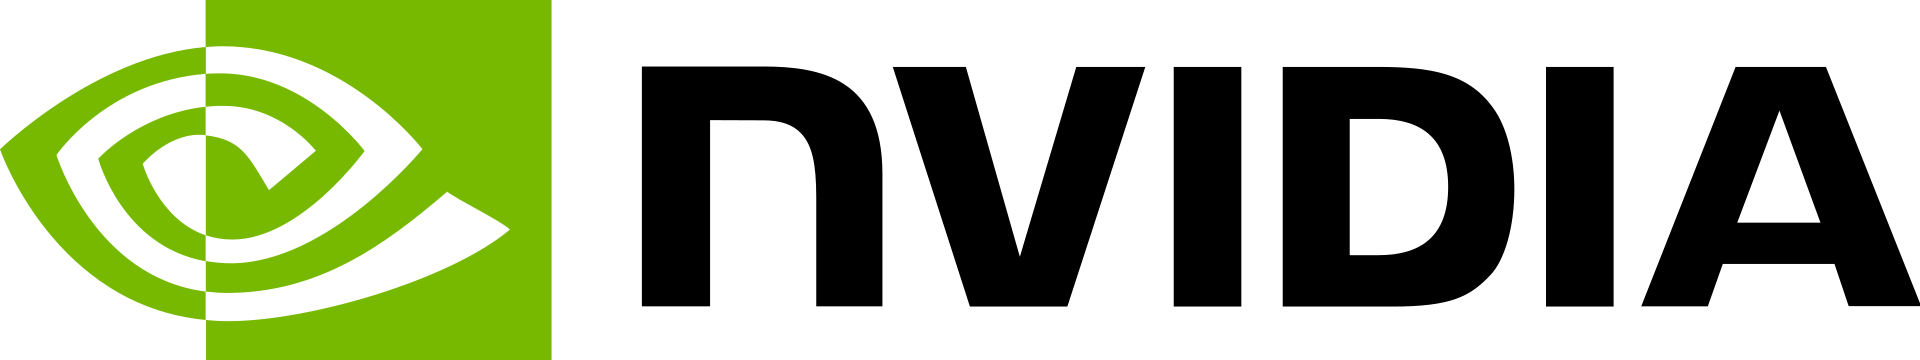

Import libraries

In [ ]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.nn as nn

import random
import torch

def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True

set_random_seed(42)

In [ ]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 79.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 13.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.3-cp310-cp310-linux_x86_64.whl size=727576 sha256=debd4550977bfe1483decf56ae5bc6149f624b1b880af5285885be469d3d3533
  Stored in directory: /root/.cache/pip/wheels/0d/32/b7/cad9f818b37cf97df4c87a8308da86a433af81651d98f8d8aa
Successfully built peewee


Import yfinance

In [ ]:
# To fetch financial data
import yfinance as yf

Choose the periods and check the data

In [ ]:
period = '10y'
interval = '1d'

In [ ]:
forex_data = yf.download('NVDA', period=period, interval=interval)

# Set the index to a datetime object
forex_data.index = pd.to_datetime(forex_data.index)

# Display the last five rows
forex_data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-02,844.489990,862.369995,832.000000,858.169983,858.169983,37789800
2024-05-03,877.890015,892.809998,870.400024,887.890015,887.890015,39834100
2024-05-06,893.900024,922.200012,890.549988,921.400024,921.400024,37620300
2024-05-07,910.979980,917.809998,823.250000,905.539978,905.539978,43623100
2024-05-08,894.880005,911.940002,894.200012,904.179993,904.179993,24982682


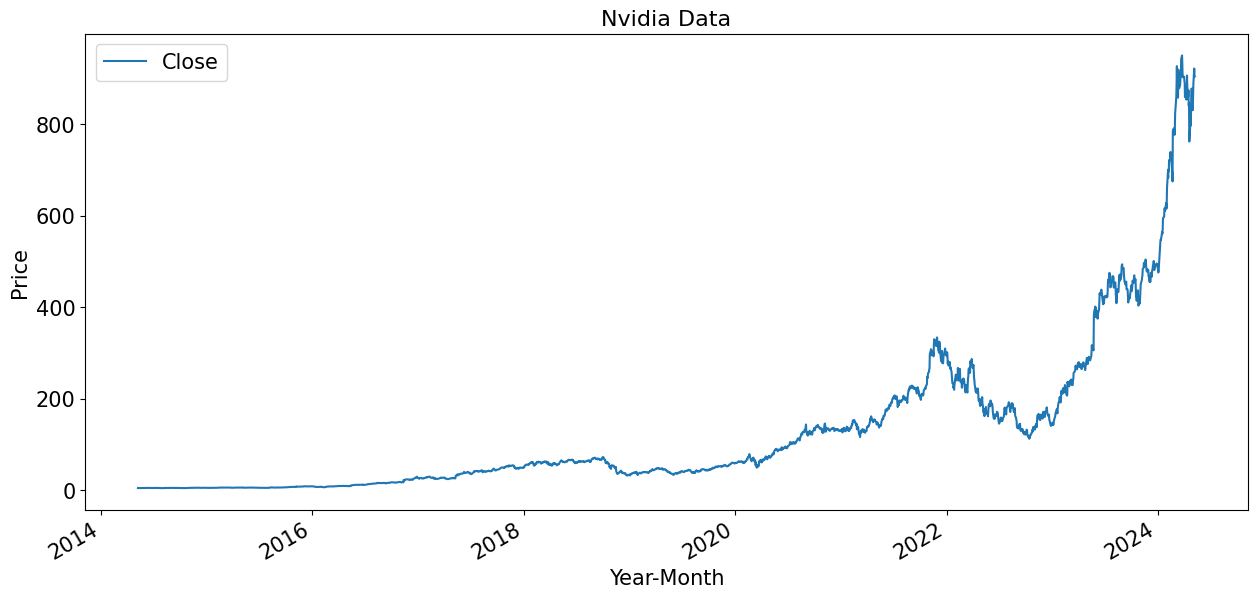

In [ ]:
# Plot the close price
plt.figure(figsize=(15, 7))
forex_data['Close'].plot()

# Set the title and axis label
plt.title('Nvidia Data', fontsize=16)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Show the plot
plt.show()

In [ ]:
forex_data_1 = yf.download('YM=F', period=period, interval=interval)

# Set the index to a datetime object
forex_data_1.index = pd.to_datetime(forex_data_1.index)

# Display the last five rows
forex_data_1.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-02,38126.0,38643.0,38037.0,38382.0,38382.0,149296
2024-05-03,38642.0,38958.0,38584.0,38832.0,38832.0,148517
2024-05-06,38920.0,39028.0,38834.0,38997.0,38997.0,77489
2024-05-07,38985.0,39127.0,38976.0,39027.0,39027.0,77489
2024-05-08,39016.0,39175.0,38936.0,39168.0,39168.0,67290


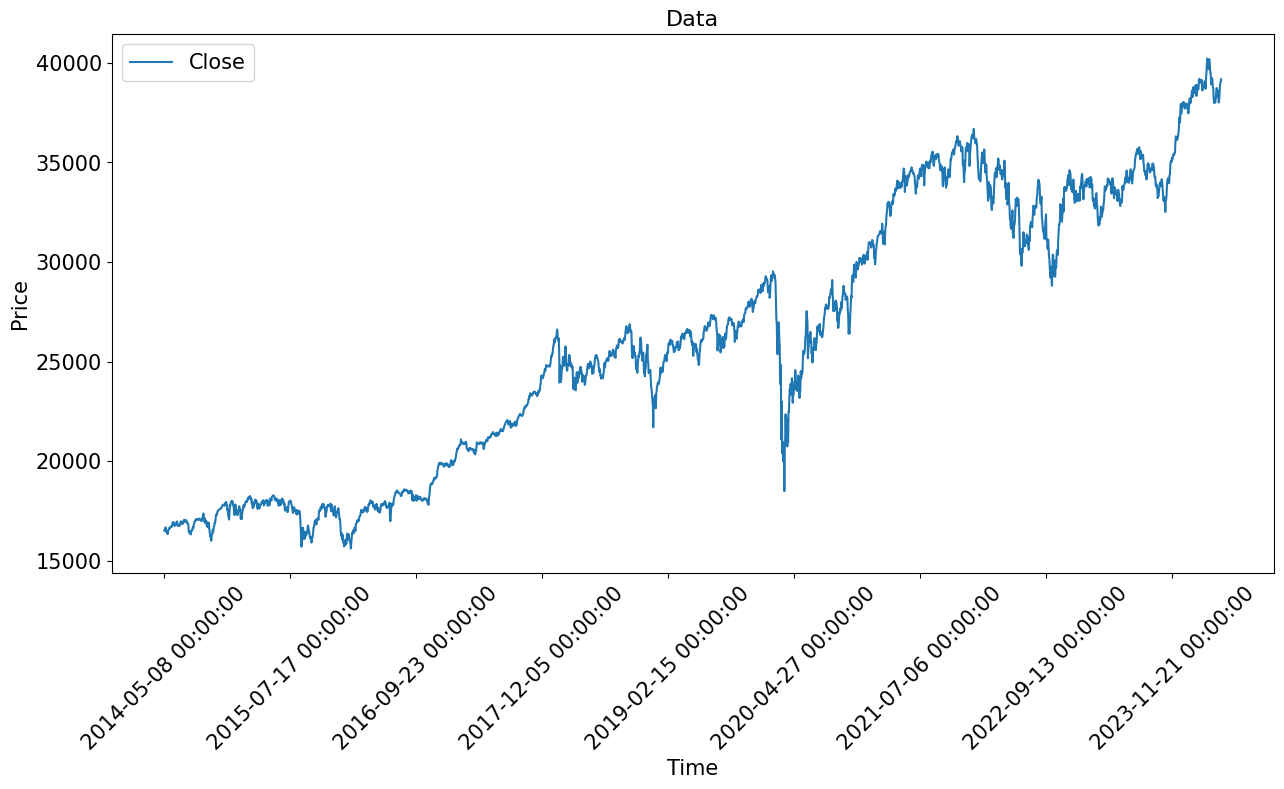

In [ ]:
# Transform index type from datetime to string
forex_data_1['dates'] = forex_data_1.index.strftime(
    '%Y-%m-%d %H:%M:%S')

# Plot the series
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(forex_data_1['dates'], forex_data_1['Close'])

# Set title and axis label
plt.title('Data', fontsize=16)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Set maximum number of tick locators
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
forex_data_2 = yf.download('ES=F', period=period, interval=interval)

# Set the index to a datetime object
forex_data_2.index = pd.to_datetime(forex_data_2.index)

# Display the last five rows
forex_data_2.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-02,5057.00,5113.00,5036.25,5091.50,5091.50,1573131
2024-05-03,5110.25,5166.75,5099.25,5154.75,5154.75,1604172
2024-05-06,5166.75,5207.75,5155.75,5206.50,5206.50,1019307
2024-05-07,5204.75,5226.75,5202.25,5213.75,5213.75,1019307
2024-05-08,5211.75,5218.00,5188.75,5213.25,5213.25,736898


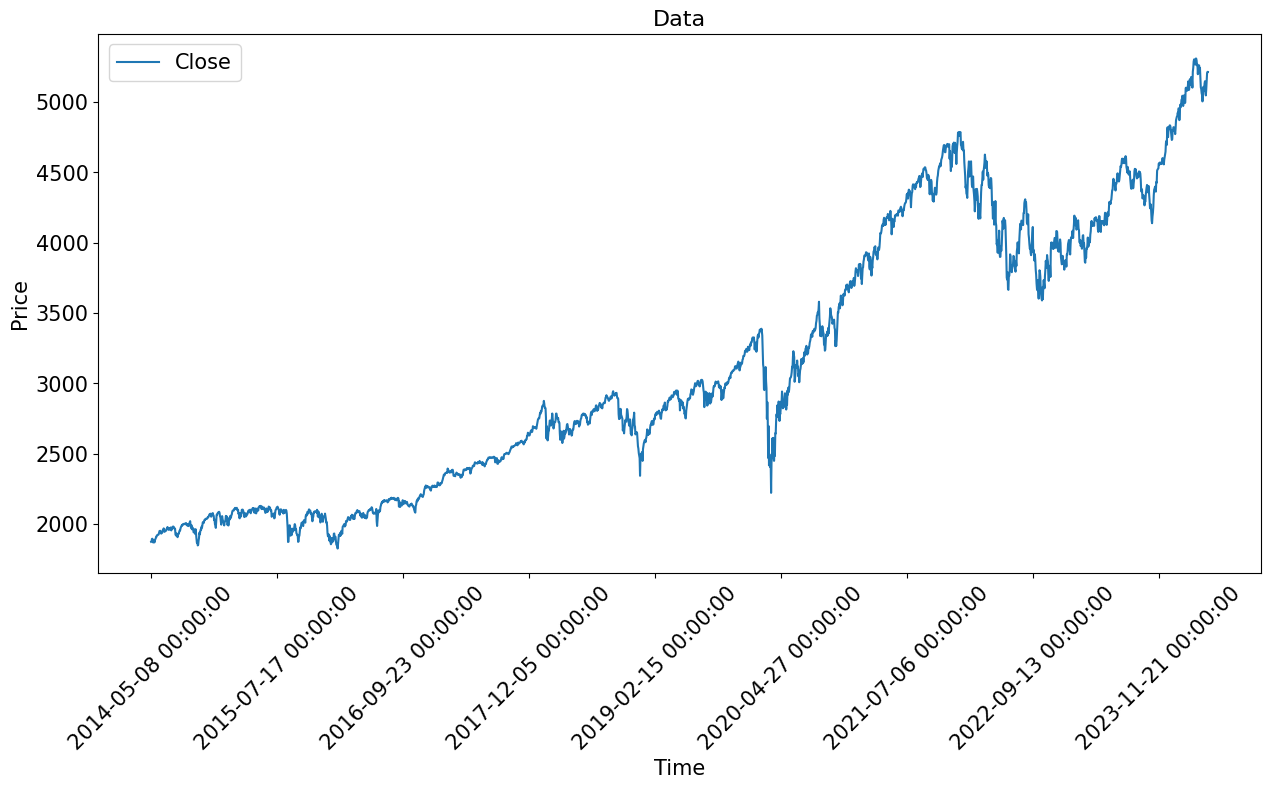

In [ ]:
# Transform index type from datetime to string
forex_data_2['dates'] = forex_data_2.index.strftime(
    '%Y-%m-%d %H:%M:%S')

# Plot the series
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(forex_data_2['dates'], forex_data_2['Close'])

# Set title and axis label
plt.title('Data', fontsize=16)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Set maximum number of tick locators
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
forex_data_3 = yf.download('NQ=F', period=period, interval=interval)

# Set the index to a datetime object
forex_data_3.index = pd.to_datetime(forex_data_3.index)

# Display the last five rows
forex_data_3.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-02,17487.00,17755.25,17386.25,17649.75,17649.75,635300
2024-05-03,17744.25,18050.25,17719.50,18000.75,18000.75,556949
2024-05-06,18047.50,18201.25,17983.75,18195.50,18195.50,395489
2024-05-07,18189.50,18266.25,18151.00,18199.50,18199.50,395489
2024-05-08,18194.00,18242.25,18072.50,18190.50,18190.50,367029


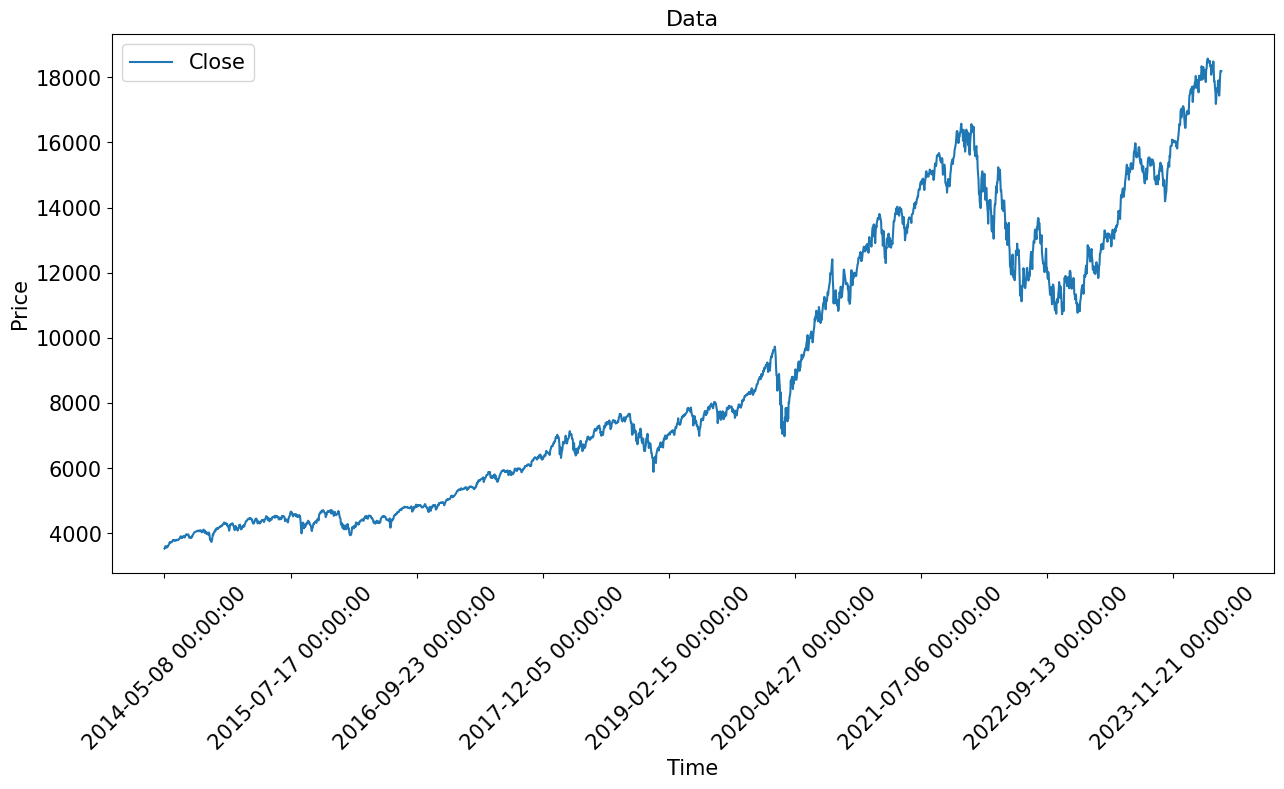

In [ ]:
# Transform index type from datetime to string
forex_data_3['dates'] = forex_data_3.index.strftime(
    '%Y-%m-%d %H:%M:%S')

# Plot the series
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(forex_data_3['dates'], forex_data_3['Close'])

# Set title and axis label
plt.title('Data', fontsize=16)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Set maximum number of tick locators
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
def display(data, pred = None, vert = None, title = 'Prediction'):
  data = np.array(data).reshape((len(data), 1))
  plt.figure(figsize=(12, 6))
  plt.plot(data, label='Some periodic function')
  if pred != None:
    plt.plot(pred, label=title)
  if vert != None:
    plt.axvline(x=vert, c='r', linestyle='--')
  plt.legend()
  plt.grid()
  plt.show()

In [ ]:
df1 = forex_data[['Close']].rename(columns={'Close': 'Nvidia'})
df2 = forex_data_1[['Close']].rename(columns={'Close': 'Dow Jones'})
df3 = forex_data_2[['Close']].rename(columns={'Close': 'S&P'})
df4 = forex_data_3[['Close']].rename(columns={'Close': 'Nasdaq'})
df = pd.merge(df1,df2, how='inner', left_index=True, right_index=True)
df = pd.merge(df,df3, how='inner', left_index=True, right_index=True)
df = pd.merge(df,df4, how='inner', left_index=True, right_index=True)
df

,Nvidia,Dow Jones,S&P,Nasdaq
Date,,,,
2014-05-08,4.625000,16510.0,1872.25,3537.50
2014-05-09,4.512500,16527.0,1873.50,3548.00
2014-05-12,4.645000,16655.0,1892.75,3607.75
2014-05-13,4.570000,16675.0,1894.25,3608.75
2014-05-14,4.525000,16587.0,1885.25,3596.25
...,...,...,...,...
2024-05-02,858.169983,38382.0,5091.50,17649.75
2024-05-03,887.890015,38832.0,5154.75,18000.75
2024-05-06,921.400024,38997.0,5206.50,18195.50


In [ ]:
train_size = int(len(df)-20)

train_data = df[:train_size].to_numpy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
train_df = scaler1.fit_transform(train_data)


In [ ]:
input_size = 4
hidden_size = 40
num_classes = 4


In [ ]:
set_random_seed(42)
import warnings
warnings.filterwarnings('ignore')

# create data "ensemble"
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length):
        _x = data[i:(i + seq_length)] # picking several sequential observations
        _y = data[i+seq_length] # picking the subsequent observation
        x.append(_x)
        y.append(_y)

    return torch.Tensor(np.array(x)), torch.Tensor(np.array(y))

# set length of the ensemble; accuracy of the predictions and
# speed perfomance almost always depend on it size
seq_length =  40 # compare 2 and 32
x, y = sliding_windows(train_df, seq_length)
print("Example of the obtained data:\n")
print("Data corresponding to the first x:")
print(x[0])
print("Data corresponding to the first y:")
print(y[0])


x_train = x
y_train = y




# Define new LSTM based model
class LSTMPredictor(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        # hidden_size == number of neurons
        super().__init__()
        self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True, dropout=0.2)
        self.lstm2 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//2, batch_first=True, dropout=0.2)
        self.lstm3 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//4, batch_first=True, dropout=0.2)
        self.lstm4 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//8, batch_first=True, dropout=0.2)
        self.fc_1 = nn.Linear(4*hidden_size, 64) # fully connected
        self.fc_11 = nn.Linear(64, 64)
        self.a = hidden_size + hidden_size//2 + hidden_size//4 + hidden_size//8
        self.fc_2 = nn.Linear(self.a, 1) # fully connected
        self.fc_3 = nn.Linear(self.a, 1) # fully connected
        self.fc_4 = nn.Linear(self.a, 1) # fully connected
        self.fc_5 = nn.Linear(self.a, 1) # fully connected
        self.relu = nn.Tanh()
        self.drop = nn.Dropout(p=0.2)

    def forward(self, x):
        out, (h1, c) = self.lstm1(x)
        out, (h2, c) = self.lstm2(x)
        out, (h3, c) = self.lstm3(x)
        out, (h4, c) = self.lstm4(x)

        out1 = torch.cat((h1, h2, h3, h4), 2)
        #out1 = self.drop(self.fc_11(self.drop(self.fc_1(self.relu(out)))))
        out2 = self.fc_2(self.relu(out1))
        out3 = self.fc_3(self.relu(out1))
        out4 = self.fc_4(self.relu(out1))
        out5 = self.fc_5(self.relu(out1))

        return torch.cat((out2, out3, out4, out5), 2)

lstm =  LSTMPredictor(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)


lstm.train()

print("LSTM training process with MSE loss:")

num_epochs = 4000
learning_rate = 0.001

criterion = torch.nn.L1Loss() # mean-squared error for regression
optimizer = torch.optim.AdamW(lstm.parameters(), lr=learning_rate)

 # Train the model
for epoch in range(num_epochs):
    y_pred = lstm(x_train)
    optimizer.zero_grad()
    #print(outputs.shape)
    loss = criterion(y_pred, y_train.unsqueeze(0))
    loss.backward()

    optimizer.step()
    if epoch % 500 == 0:
        print(f"Epoch: {epoch},".ljust(15), "loss: %1.5f" % (loss.item()))

Example of the obtained data:

Data corresponding to the first x:
tensor([[0.0005, 0.0365, 0.0137, 0.0000],
        [0.0003, 0.0372, 0.0141, 0.0007],
        [0.0005, 0.0424, 0.0196, 0.0047],
        [0.0004, 0.0432, 0.0200, 0.0047],
        [0.0003, 0.0396, 0.0174, 0.0039],
        [0.0003, 0.0329, 0.0123, 0.0017],
        [0.0003, 0.0347, 0.0144, 0.0030],
        [0.0005, 0.0353, 0.0166, 0.0050],
        [0.0004, 0.0295, 0.0125, 0.0039],
        [0.0004, 0.0361, 0.0174, 0.0064],
        [0.0004, 0.0372, 0.0189, 0.0073],
        [0.0004, 0.0396, 0.0208, 0.0091],
        [0.0005, 0.0424, 0.0243, 0.0122],
        [0.0006, 0.0413, 0.0243, 0.0119],
        [0.0006, 0.0435, 0.0268, 0.0132],
        [0.0006, 0.0444, 0.0278, 0.0132],
        [0.0006, 0.0451, 0.0279, 0.0126],
        [0.0005, 0.0448, 0.0280, 0.0129],
        [0.0006, 0.0450, 0.0291, 0.0137],
        [0.0006, 0.0490, 0.0327, 0.0159],
        [0.0006, 0.0537, 0.0358, 0.0173],
        [0.0006, 0.0538, 0.0361, 0.0170],
        [0

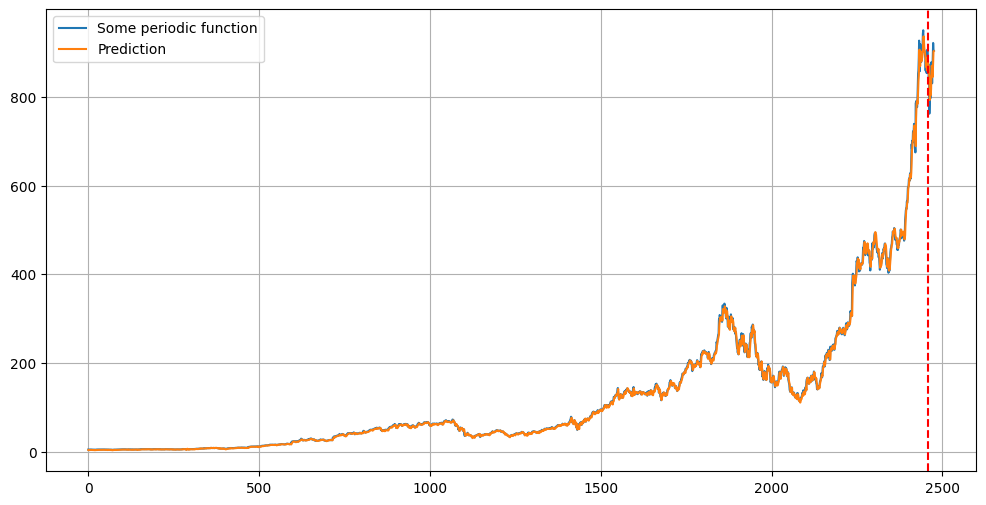

In [ ]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,0], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,0]), vert=train_size-seq_length+1)

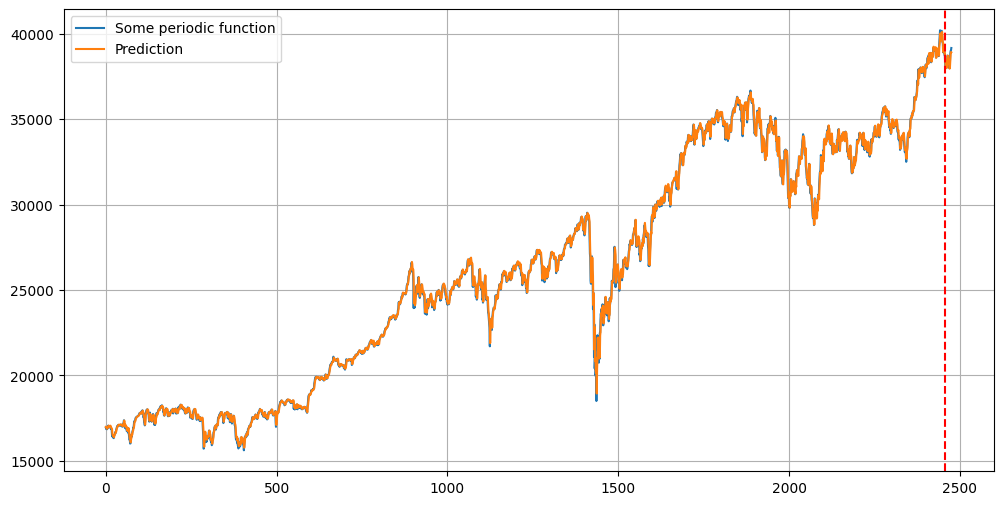

In [ ]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,1], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,1]), vert=train_size-seq_length+1)

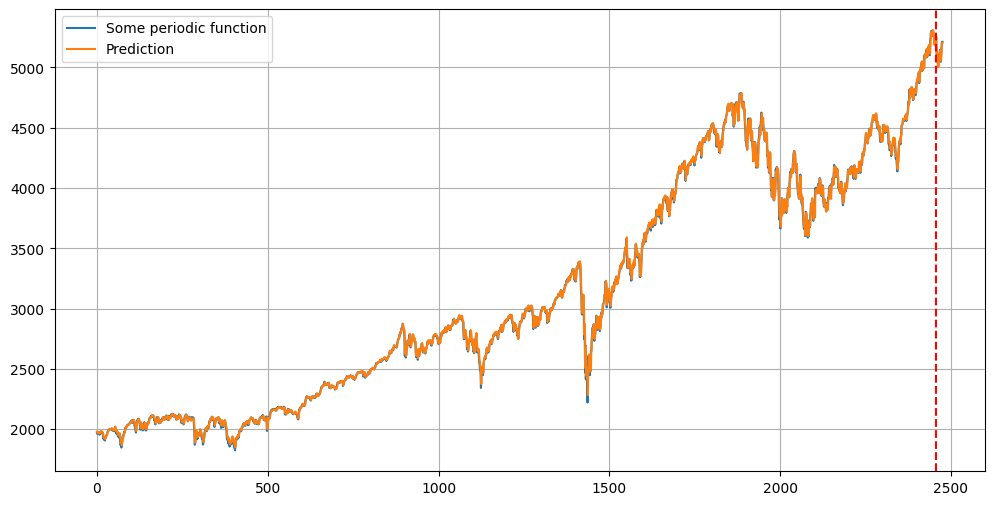

In [ ]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,2], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,2]), vert=train_size-seq_length+1)

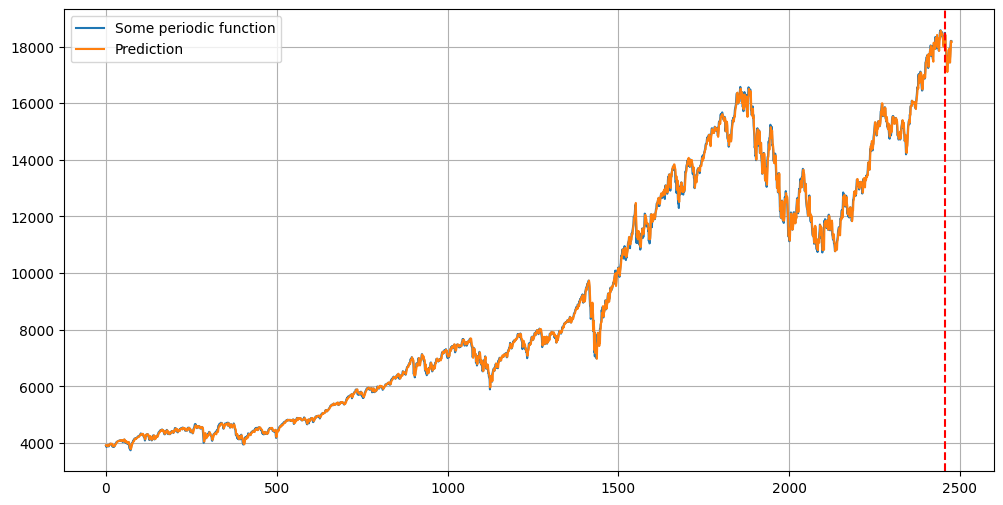

In [ ]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,3], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,3]), vert=train_size-seq_length+1)

In [ ]:
data_pred = scaler1.transform(df[:train_size].to_numpy().reshape(-1,num_classes))

x_s, y_s = sliding_windows(data_pred, seq_length)
for i in range(20):
    data_pred = np.append(data_pred, (lstm(x_s).detach().numpy()[0][-1]).reshape(-1,num_classes),  axis=0)
    x_s, y_s = sliding_windows(data_pred, seq_length)
data_pred

array([[4.51987305e-04, 3.65129706e-02, 1.37055109e-02, 0.00000000e+00],
       [3.33043012e-04, 3.72041961e-02, 1.40642939e-02, 6.98265973e-04],
       [4.73132901e-04, 4.24087176e-02, 1.95895522e-02, 4.67173187e-03],
       ...,
       [8.89096439e-01, 9.30479169e-01, 9.58277106e-01, 9.50065792e-01],
       [8.90691102e-01, 9.40144062e-01, 9.67400730e-01, 9.56281662e-01],
       [8.87578547e-01, 9.28700924e-01, 9.56590712e-01, 9.47803319e-01]])

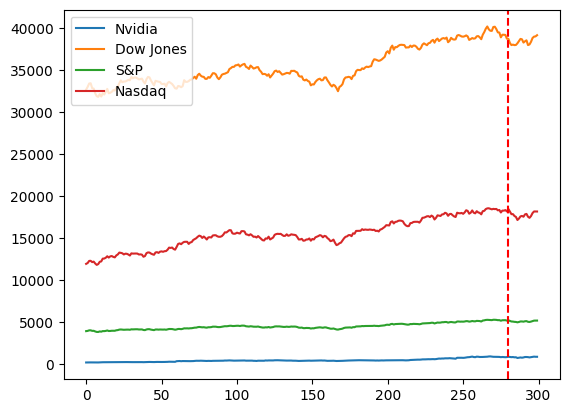

In [ ]:
plt.plot(df.to_numpy()[-300:])
plt.legend(['Nvidia','Dow Jones','S&P','Nasdaq'], loc=2)
plt.axvline(x=300-20, c='r', linestyle='--')

Predicted plot

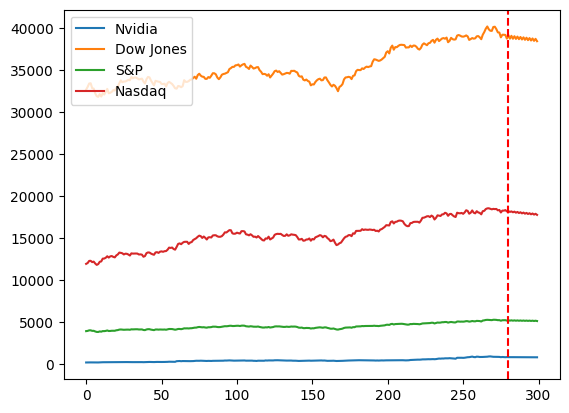

In [ ]:
plt.plot(scaler1.inverse_transform(data_pred.reshape(-1,num_classes))[-300:])
plt.legend(['Nvidia','Dow Jones','S&P','Nasdaq'], loc=2)
plt.axvline(x=300-20, c='r', linestyle='--')

In [ ]:
train_size = int(len(df))

train_data = df[:train_size].to_numpy()
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
train_df = scaler1.fit_transform(train_data)


set_random_seed(42)
import warnings
warnings.filterwarnings('ignore')

# create data "ensemble"
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length):
        _x = data[i:(i + seq_length)] # picking several sequential observations
        _y = data[i+seq_length] # picking the subsequent observation
        x.append(_x)
        y.append(_y)

    return torch.Tensor(np.array(x)), torch.Tensor(np.array(y))

# set length of the ensemble; accuracy of the predictions and
# speed perfomance almost always depend on it size
seq_length = 40 # compare 2 and 32
x, y = sliding_windows(train_df, seq_length)
print("Example of the obtained data:\n")
print("Data corresponding to the first x:")
print(x[0])
print("Data corresponding to the first y:")
print(y[0])


x_train = x
y_train = y




# Define new LSTM based model
class LSTMPredictor(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        # hidden_size == number of neurons
        super().__init__()
        self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True, dropout=0.2)
        self.lstm2 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//2, batch_first=True, dropout=0.2)
        self.lstm3 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//4, batch_first=True, dropout=0.2)
        self.lstm4 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//8, batch_first=True, dropout=0.2)
        self.fc_1 = nn.Linear(4*hidden_size, 64) # fully connected
        self.fc_11 = nn.Linear(64, 64)
        self.a = hidden_size + hidden_size//2 + hidden_size//4 + hidden_size//8
        self.fc_2 = nn.Linear(self.a, 1) # fully connected
        self.fc_3 = nn.Linear(self.a, 1) # fully connected
        self.fc_4 = nn.Linear(self.a, 1) # fully connected
        self.fc_5 = nn.Linear(self.a, 1) # fully connected
        self.relu = nn.Tanh()
        self.drop = nn.Dropout(p=0.2)

    def forward(self, x):
        out, (h1, c) = self.lstm1(x)
        out, (h2, c) = self.lstm2(x)
        out, (h3, c) = self.lstm3(x)
        out, (h4, c) = self.lstm4(x)

        out1 = torch.cat((h1, h2, h3, h4), 2)
        #out1 = self.drop(self.fc_11(self.drop(self.fc_1(self.relu(out)))))
        out2 = self.fc_2(self.relu(out1))
        out3 = self.fc_3(self.relu(out1))
        out4 = self.fc_4(self.relu(out1))
        out5 = self.fc_5(self.relu(out1))

        return torch.cat((out2, out3, out4, out5), 2)

lstm =  LSTMPredictor(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

lstm.train()

print("LSTM training process with MSE loss:")

num_epochs = 4000
learning_rate = 0.001

criterion = torch.nn.L1Loss() # mean-squared error for regression
optimizer = torch.optim.AdamW(lstm.parameters(), lr=learning_rate)

 # Train the model
for epoch in range(num_epochs):
    y_pred = lstm(x_train)
    optimizer.zero_grad()
    #print(outputs.shape)
    loss = criterion(y_pred, y_train.unsqueeze(0))
    loss.backward()

    optimizer.step()
    if epoch % 500 == 0:
        print(f"Epoch: {epoch},".ljust(15), "loss: %1.5f" % (loss.item()))

Example of the obtained data:

Data corresponding to the first x:
tensor([[0.0005, 0.0365, 0.0137, 0.0000],
        [0.0003, 0.0372, 0.0141, 0.0007],
        [0.0005, 0.0424, 0.0196, 0.0047],
        [0.0004, 0.0432, 0.0200, 0.0047],
        [0.0003, 0.0396, 0.0174, 0.0039],
        [0.0003, 0.0329, 0.0123, 0.0017],
        [0.0003, 0.0347, 0.0144, 0.0030],
        [0.0005, 0.0353, 0.0166, 0.0050],
        [0.0004, 0.0295, 0.0125, 0.0039],
        [0.0004, 0.0361, 0.0174, 0.0064],
        [0.0004, 0.0372, 0.0189, 0.0073],
        [0.0004, 0.0396, 0.0208, 0.0091],
        [0.0005, 0.0424, 0.0243, 0.0122],
        [0.0006, 0.0413, 0.0243, 0.0119],
        [0.0006, 0.0435, 0.0268, 0.0132],
        [0.0006, 0.0444, 0.0278, 0.0132],
        [0.0006, 0.0451, 0.0279, 0.0126],
        [0.0005, 0.0448, 0.0280, 0.0129],
        [0.0006, 0.0450, 0.0291, 0.0137],
        [0.0006, 0.0490, 0.0327, 0.0159],
        [0.0006, 0.0537, 0.0358, 0.0173],
        [0.0006, 0.0538, 0.0361, 0.0170],
        [0

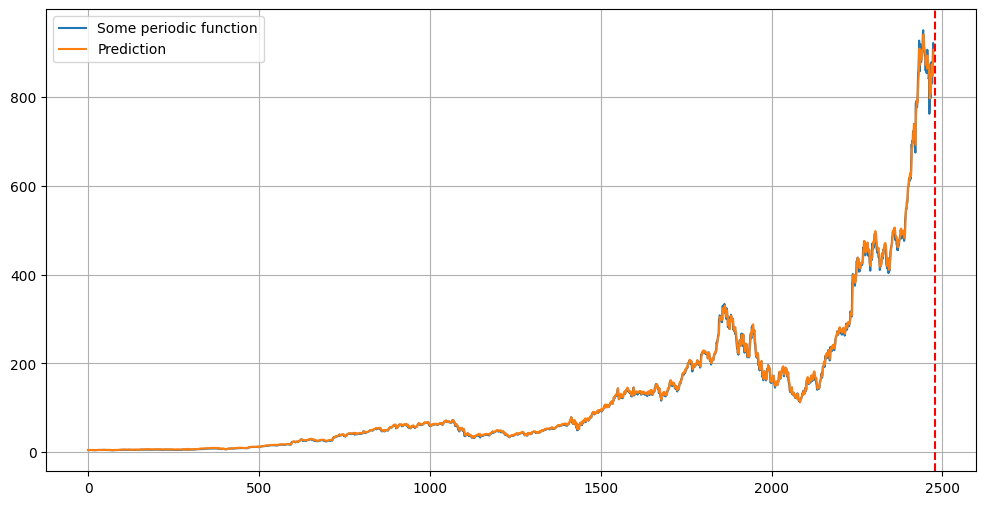

In [ ]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,0], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,0]), vert=train_size-seq_length+1)

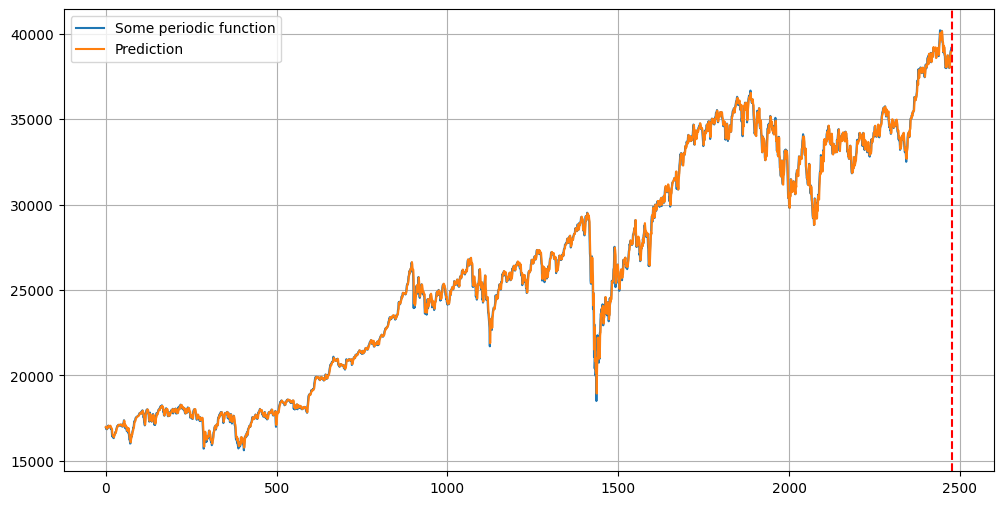

In [ ]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,1], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,1]), vert=train_size-seq_length+1)

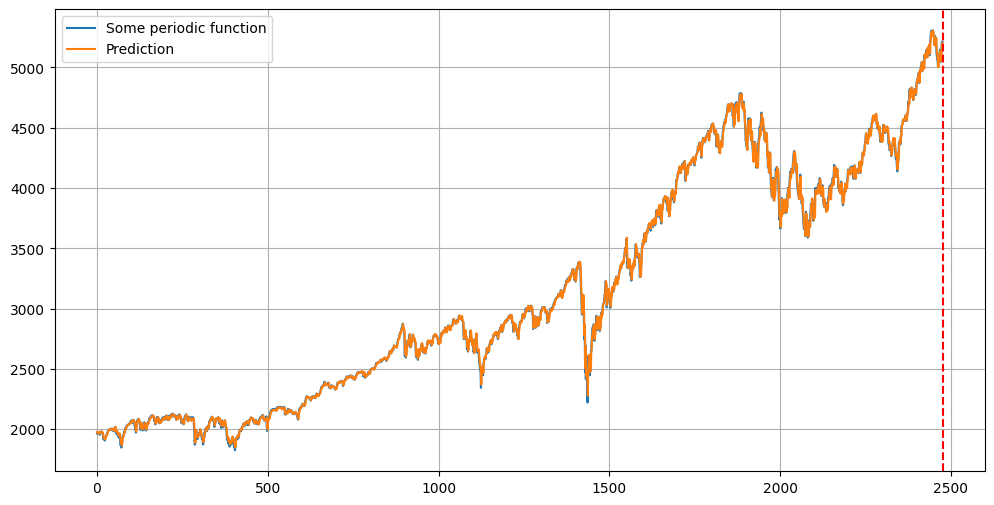

In [ ]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,2], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,2]), vert=train_size-seq_length+1)

In [ ]:
data_pred = scaler1.transform(df[:-20].to_numpy().reshape(-1,num_classes))

x_s, y_s = sliding_windows(data_pred, seq_length)
for i in range(20):
    data_pred = np.append(data_pred, (lstm(x_s).detach().numpy()[0][-1]).reshape(-1,num_classes),  axis=0)
    x_s, y_s = sliding_windows(data_pred, seq_length)
data_pred

array([[4.51987305e-04, 3.65129706e-02, 1.37055109e-02, 0.00000000e+00],
       [3.33043012e-04, 3.72041961e-02, 1.40642939e-02, 6.98265973e-04],
       [4.73132901e-04, 4.24087176e-02, 1.95895522e-02, 4.67173187e-03],
       ...,
       [9.21222448e-01, 9.41152751e-01, 9.57263887e-01, 9.53150153e-01],
       [9.24672246e-01, 9.52651441e-01, 9.67990279e-01, 9.60718274e-01],
       [9.22927976e-01, 9.40839291e-01, 9.56142008e-01, 9.51763868e-01]])

In [ ]:
df[-20:]

,Nvidia,Dow Jones,S&P,Nasdaq
Date,,,,
2024-04-11,906.159973,38732.0,5243.25,18485.00
2024-04-12,881.859985,38238.0,5167.50,18179.25
2024-04-15,860.010010,37993.0,5104.00,17876.25
2024-04-16,874.150024,38046.0,5092.50,17881.25
2024-04-17,840.349976,37990.0,5062.25,17658.50
2024-04-18,846.710022,38007.0,5049.00,17547.25
2024-04-19,762.000000,38208.0,5003.75,17180.75
2024-04-22,795.179993,38468.0,5047.50,17350.00
2024-04-23,824.229980,38726.0,5106.50,17606.75


In [ ]:
pd.DataFrame(scaler1.inverse_transform(data_pred.reshape(-1,num_classes))[-(20):-1])

,0,1,2,3
0,863.947614,39206.762324,5244.286369,18223.461704
1,867.621374,38785.849284,5202.521062,18140.474218
2,866.453501,39135.243184,5235.794007,18197.415518
3,867.203407,38797.082603,5195.488569,18092.568417
4,868.183099,39108.724752,5229.254505,18170.066127
5,867.646969,38804.265594,5189.430844,18049.685425
6,869.679190,39092.759454,5223.600683,18138.760512
7,868.558108,38801.700240,5183.670699,18010.954944
8,871.125332,39079.767035,5218.315671,18107.709443
9,869.724516,38794.234327,5178.201697,17976.652135


In [ ]:
data_pred = scaler1.transform(df.to_numpy().reshape(-1,num_classes))

x_s, y_s = sliding_windows(data_pred, seq_length)
for i in range(20):
    data_pred = np.append(data_pred, (lstm(x_s).detach().numpy()[0][-1]).reshape(-1,num_classes),  axis=0)
    x_s, y_s = sliding_windows(data_pred, seq_length)
data_pred

array([[4.51987305e-04, 3.65129706e-02, 1.37055109e-02, 0.00000000e+00],
       [3.33043012e-04, 3.72041961e-02, 1.40642939e-02, 6.98265973e-04],
       [4.73132901e-04, 4.24087176e-02, 1.95895522e-02, 4.67173187e-03],
       ...,
       [9.58783507e-01, 9.55358982e-01, 9.69517708e-01, 9.63094532e-01],
       [9.58214641e-01, 9.50697303e-01, 9.64713871e-01, 9.59373355e-01],
       [9.59694266e-01, 9.55395341e-01, 9.68940794e-01, 9.62241054e-01]])

In [ ]:
pd.DataFrame(scaler1.inverse_transform(data_pred.reshape(-1,num_classes))[-(20):-1])

,0,1,2,3
0,906.717274,38956.833800,5201.671722,18143.372820
1,906.329636,39127.038448,5215.414001,18163.948052
2,906.563031,38982.534250,5201.578274,18122.495538
3,906.739711,39116.146688,5216.153696,18147.672323
4,906.432127,38987.433344,5200.793725,18096.554218
5,907.068267,39109.092697,5215.066790,18127.558680
6,906.567541,38990.419416,5199.131594,18072.529166
7,907.500779,39107.449404,5213.300619,18106.753998
8,906.941310,38992.731166,5197.061198,18049.976719
9,908.056303,39107.301347,5211.200735,18086.350854


In [ ]:
df_pred = scaler1.inverse_transform(data_pred.reshape(-1,num_classes))
df_pred

array([[4.62500000e+00, 1.65100000e+04, 1.87225000e+03, 3.53750000e+03],
       [4.51249981e+00, 1.65270000e+04, 1.87350000e+03, 3.54800000e+03],
       [4.64499998e+00, 1.66550000e+04, 1.89275000e+03, 3.60775000e+03],
       ...,
       [9.11036533e+02, 3.91080988e+04, 5.20229969e+03, 1.80197933e+04],
       [9.10498486e+02, 3.89934495e+04, 5.18556313e+03, 1.79638370e+04],
       [9.11897949e+02, 3.91089930e+04, 5.20028973e+03, 1.80069593e+04]])

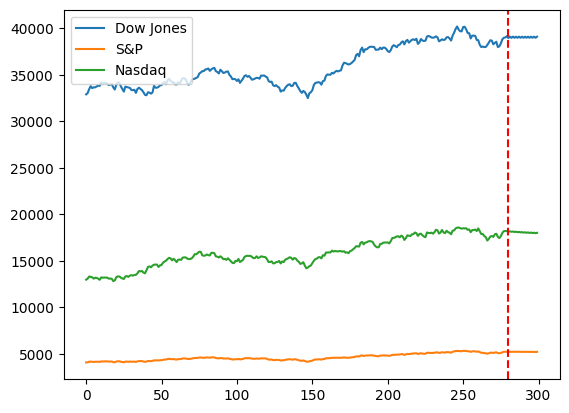

In [ ]:
plt.plot(df_pred[-300:,1:4])
plt.legend(['Dow Jones','S&P','Nasdaq'], loc=2)
plt.axvline(x=300-20, c='r', linestyle='--')

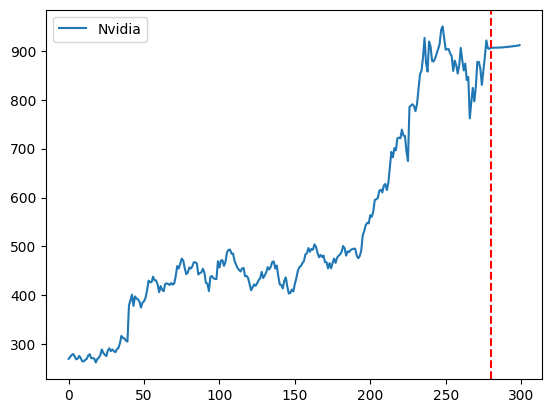

In [ ]:
plt.plot(df_pred[-300:,0])
plt.legend(['Nvidia'], loc=2)
plt.axvline(x=300-20, c='r', linestyle='--')